In [23]:
# un histograma es una gráfica de que muestra la distribución de frecuencias de un conjunto de datos.
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


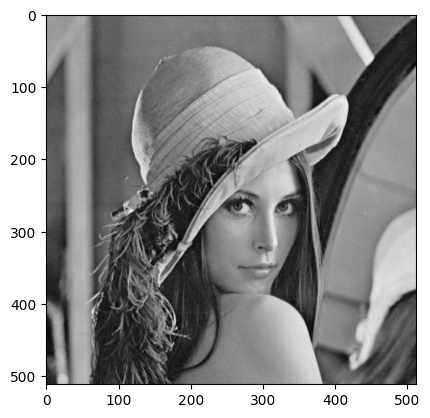

In [24]:
img = cv.imread('../images/lena.jpg',0)
plt.imshow(img, cmap = 'gray')

# Histograma de imagen en blanco y negro

In [25]:
histograma = cv.calcHist([img], [0], None, [256], (0,255))

In [26]:
print(type(histograma))
print(histograma.shape)

<class 'numpy.ndarray'>
(256, 1)


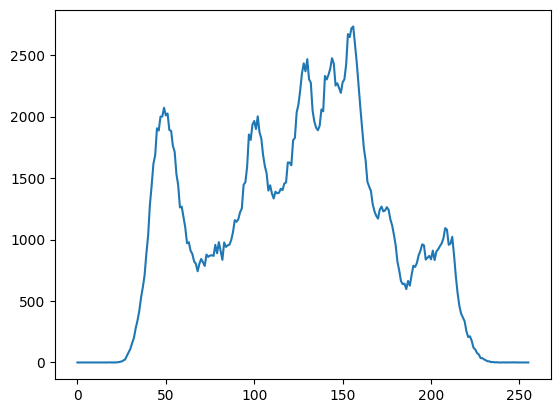

In [27]:
plt.plot(histograma)

# Histograma de cada canal

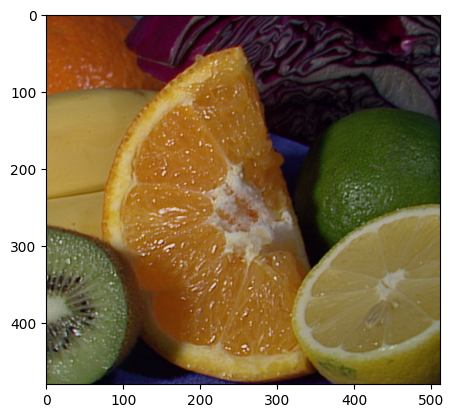

In [28]:
fruta = cv.imread("../images/fruits.jpg")[:,:,::-1]
plt.imshow(fruta)

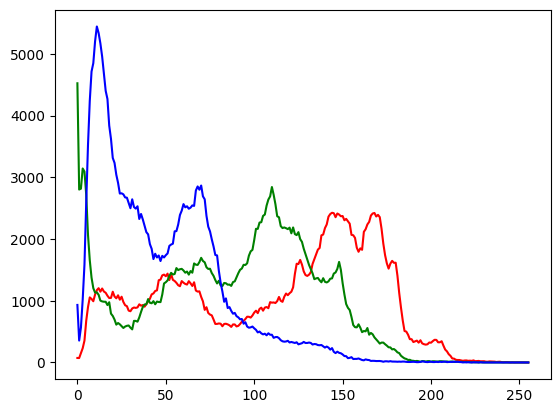

In [29]:
r, g, b = cv.split(fruta)

histo_r = cv.calcHist([r], [0], None, [256], (0, 255))
plt.plot(histo_r, color = 'red')
histo_g = cv.calcHist([g], [0], None, [256], (0, 255))
plt.plot(histo_g, color = 'green')
histo_b = cv.calcHist([b], [0], None, [256], (0, 255))
plt.plot(histo_b, color = 'blue')


## Ecualizar

In [30]:
fruta_gris = cv.cvtColor(fruta, cv.COLOR_RGB2GRAY)
img_ec = cv.equalizeHist(fruta_gris)
img_ec.shape

(480, 512)

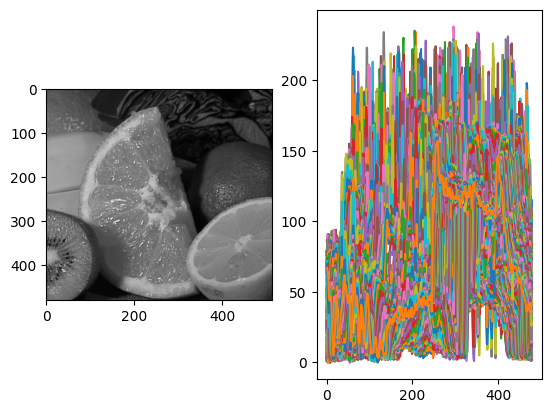

In [31]:
# Muestra la información que tienen los pixeles claros, oscuros y predominancia de los mismos.

plt.subplot(121)
plt.imshow(fruta_gris, cmap = 'gray')
plt.subplot(122)
plt.plot(fruta_gris)
print()


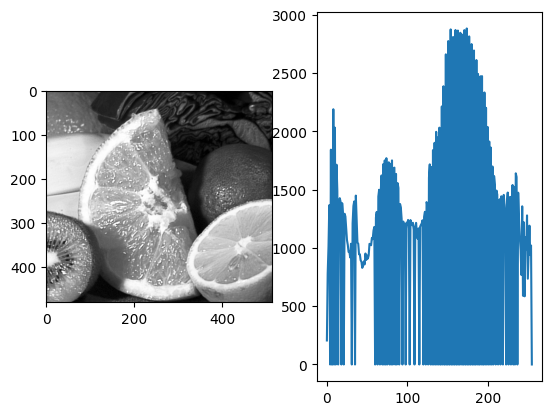

In [32]:
plt.subplot(121)
plt.imshow(img_ec, cmap = 'gray')
histo_ecualizado = cv.calcHist([img_ec], [0], None, [256], (0, 255))
plt.subplot(122)
plt.plot(histo_ecualizado)


# Ecaulizar e Histograma de imagen a color

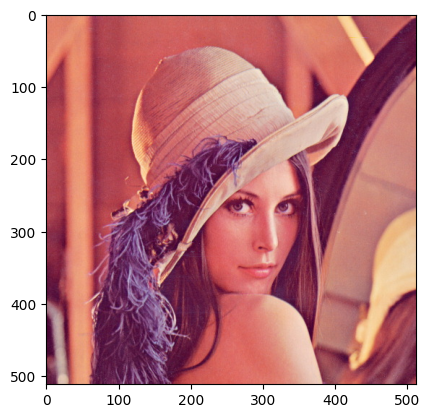

In [33]:
img = cv.imread("../images/lena.jpg")[:, :, ::-1]
plt.imshow(img)

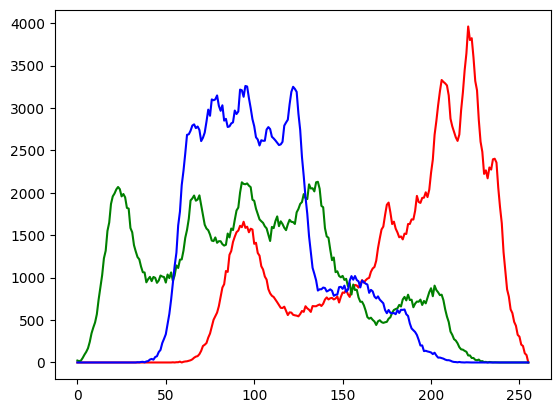

In [34]:
# histogramas sin equalizacioni
r, g, b = cv.split(img)
hist_r = cv.calcHist([r], [0], None, [256], (0, 255))
hist_g = cv.calcHist([g], [0], None, [256], (0, 255))
hist_b = cv.calcHist([b], [0], None, [256], (0, 255))

plt.plot(hist_r, color = 'red')
plt.plot(hist_g, color = 'green')
plt.plot(hist_b, color = 'blue')


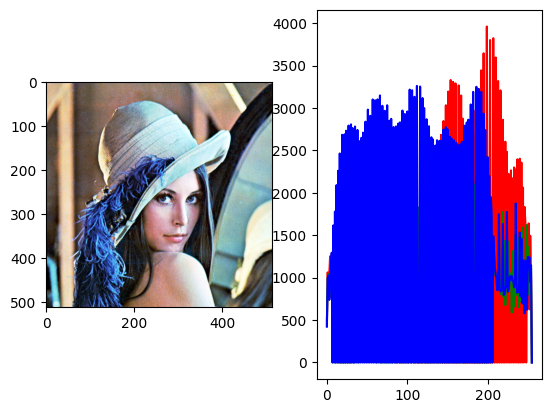

In [45]:
# ecualizar canales y mostrar imagenes
eq_r = cv.equalizeHist(r)
eq_g = cv.equalizeHist(g)
eq_b = cv.equalizeHist(b)


eq_hist_r = cv.calcHist([eq_r], [0], None, [256], (0, 255))
eq_hist_g = cv.calcHist([eq_g], [0], None, [256], (0, 255))
eq_hist_b = cv.calcHist([eq_b], [0], None, [256], (0, 255))


img_eq_junta = cv.merge((eq_r,eq_g, eq_b))
plt.subplot(121)
plt.imshow(img_eq_junta)

plt.subplot(122)
plt.plot(eq_hist_r, color = 'red')
plt.plot(eq_hist_g, color = 'green')
plt.plot(eq_hist_b, color = 'blue')



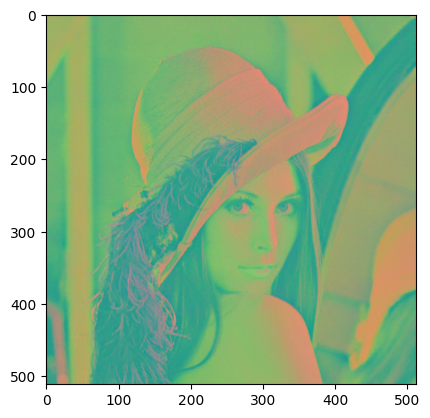

In [51]:
img = cv.imread("../images/lena.jpg")[:, :, ::-1]
img_ycrcb = cv.cvtColor(img, cv.COLOR_RGB2YCrCb)
plt.imshow(img_ycrcb, cmap = 'gray')

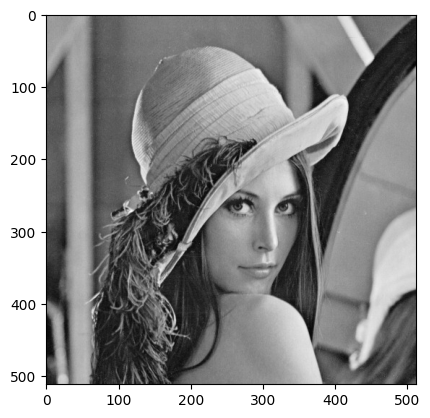

In [52]:
plt.imshow(img_ycrcb[:,:,0], cmap = 'gray')

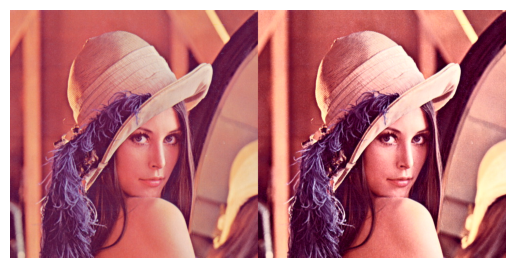

In [60]:
# separar
y, cr, cb = cv.split(img_ycrcb)

# ecualizar
y_eq = cv.equalizeHist(y)

# no se equalizan los demás canales
# cr_eq = cv.equalizeHist(cr)
# cb_eq = cv.equalizeHist(cb)

# juntar
eq_img_ycrcb = cv.merge((y_eq, cr, cb))

# a rgb
img_rgb_eq_ycrcb = cv.cvtColor(eq_img_ycrcb, cv.COLOR_YCrCb2RGB)

# mostrar
plt.imshow(np.hstack((img,img_rgb_eq_ycrcb)))
plt.axis("off")
plt.show()
